Seaborn is a statistical plotting library and it's built on top of matplotlib.Seaborn has really beautiful default styles. It's also designed to work well with the pandas dataframe objects.

For more info, visit http://seaborn.pydata.org/

# Installation

At your command line or terminal:

```conda install seaborn```   
or

```pip install seaborn```

Following are some general types of Seaborn plots in different categories:

# Distribution plots

Some plots allow us to visualize the distribution of a data set. These plots are:

- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

Seaborn comes with built-in data sets! So lets use the 'tips' dataset for analysis with distribution plots.

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


For **univariate** ( single variable ) data:

### distplot
The distplot shows the distribution of a univariate set of observations.

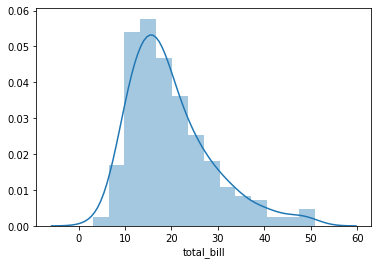

In [3]:
sns.distplot(tips['total_bill'])

To remove the kde layer and just have the histogram:

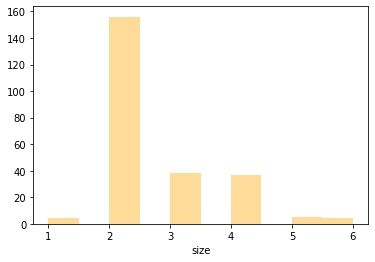

In [5]:
sns.distplot(tips['size'],bins=10,kde=False,color='orange')

### rugplot

Draws a dash for every point on univariate distribution

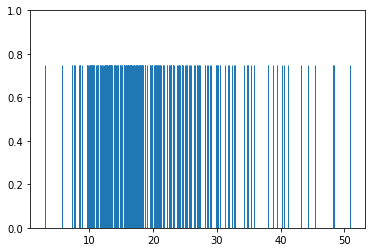

In [11]:
sns.rugplot(tips['total_bill'],height=0.75)

For **bivariate** data:

### jointplot
jointplot() allows to match up two distplots for bivariate data. With the choice of what kind parameter to compare with:

- “scatter”
- “reg”
- “resid”
- “kde”
- “hex”

In [6]:
import scipy.stats as stats

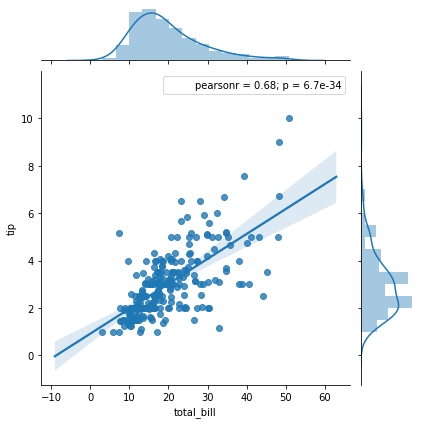

In [8]:
j = sns.jointplot(x=tips['total_bill'],y=tips['tip'],data=tips,kind='reg')
j.annotate(stats.pearsonr)

### pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

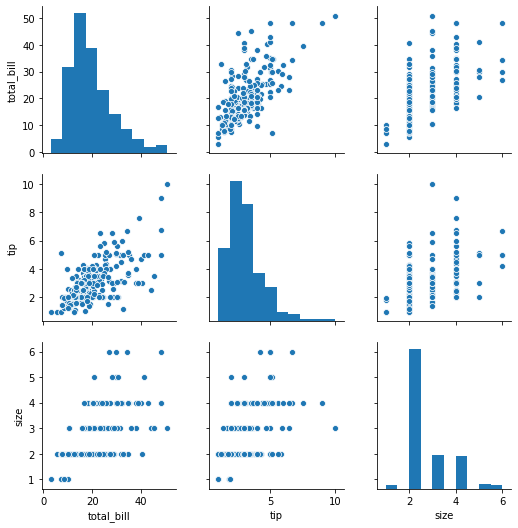

In [9]:
sns.pairplot(tips)

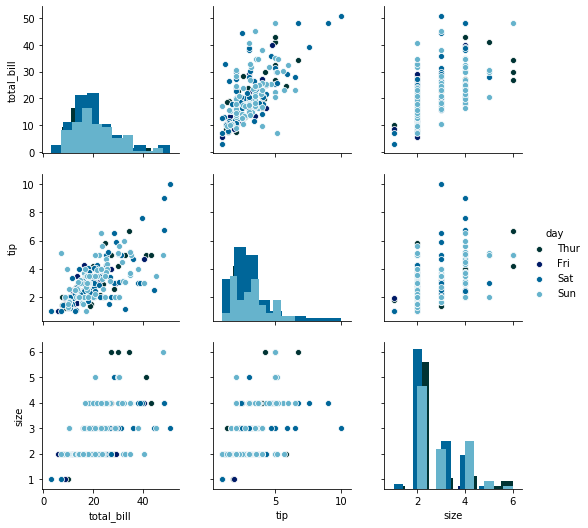

In [10]:
sns.pairplot(tips,hue='day',palette='ocean',diag_kind='hist')

### kdeplot
kdeplots are [Kernel Density Estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

(0, 1)

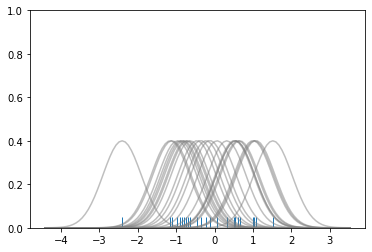

In [12]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

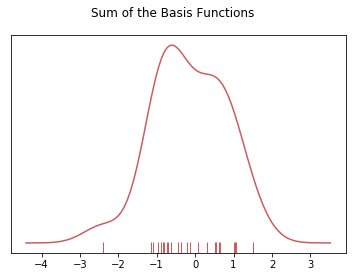

In [13]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

([], <a list of 0 Text yticklabel objects>)

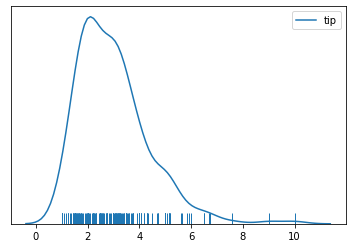

In [14]:
sns.rugplot(tips['tip'])
sns.kdeplot(tips['tip'])
plt.yticks([])

# Categorical Data Plots

There are a few main plot types for plotting categorical data:

- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

### Barplot
Visualisation of an aggregate function (categorical) versus a numerical (continuous) i.e. for example, plot of unique genders versus the mean of total bill

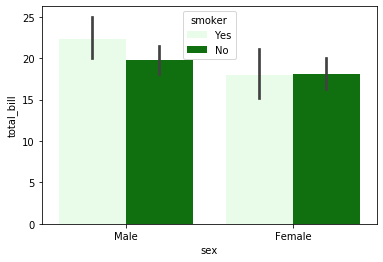

In [15]:
sns.barplot(x='sex',y='total_bill',data=tips,hue=tips['smoker'],color='green')

In [16]:
import numpy as np

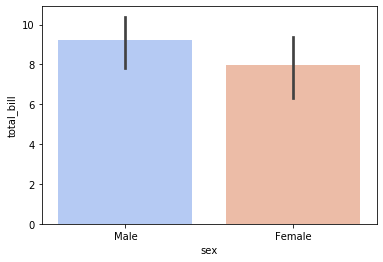

In [17]:
sns.barplot(x='sex',y='total_bill',data=tips,palette='coolwarm',estimator=np.std)

### Countplot
Counts the number of occurences of the categorical i.e. x axis thus, no y is provided

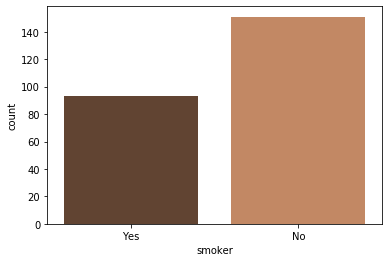

In [18]:
sns.countplot(x=tips['smoker'],data=tips,palette='copper')

### Boxplots
To calculate the 5 number summary of categorical data versus a numeric : the minimum, Q1 , median , Q3 and the maximum

    Anything outside of these is an outlier

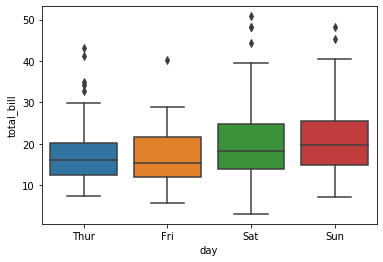

In [19]:
sns.boxplot(x=tips['day'],y=tips['total_bill'],data=tips)

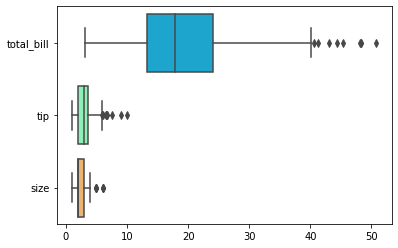

In [20]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

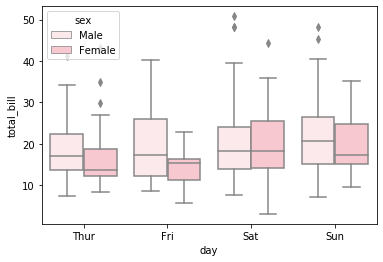

In [21]:
sns.boxplot(x=tips['day'],y=tips['total_bill'],data=tips,hue=tips['sex'],color='pink')

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

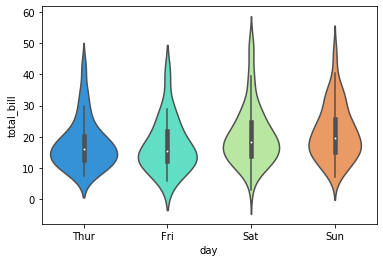

In [22]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

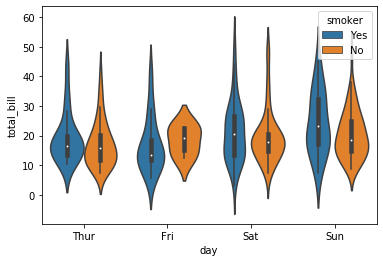

In [23]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')

Use split=True to use the plot space better

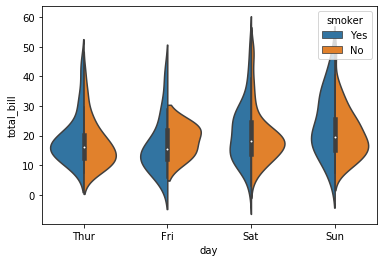

In [24]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

### stripplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

As the plotted data points are kind of difficult to understand due to superimposition, we can use jitter=True

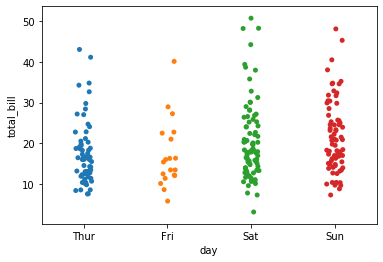

In [25]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

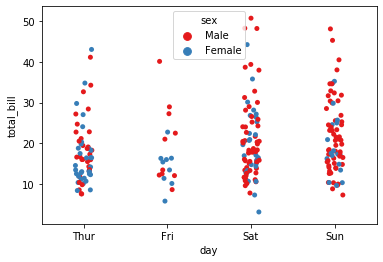

In [26]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

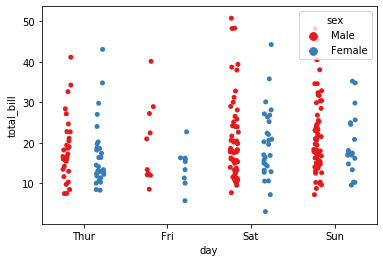

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

### swarmplot
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

Combination of strip plots and violin plots. ( Not recommended for large datasets)

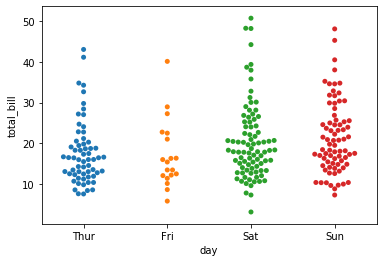

In [30]:
sns.swarmplot(x='day',y='total_bill',data=tips)

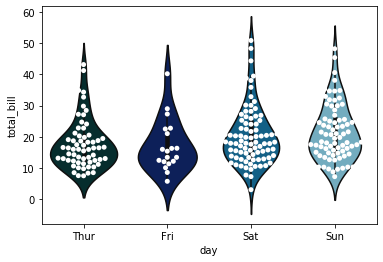

In [31]:
sns.violinplot(x='day',y='total_bill',data=tips,palette='ocean')
sns.swarmplot(x='day',y='total_bill',data=tips,color='white')

### Factor plot or Catplot (in latest version)

This is the most general plot which can be used to invoke any of the above plots by changing the values of its parameter point to 'bar','violin',etc
factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type

/Users/rajkumar/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


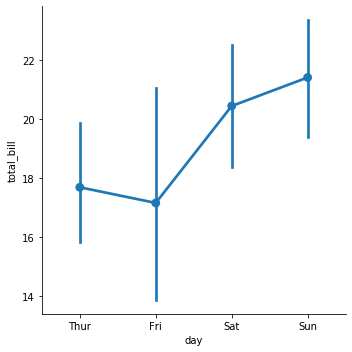

In [32]:
sns.factorplot(x='day',y='total_bill',data=tips)

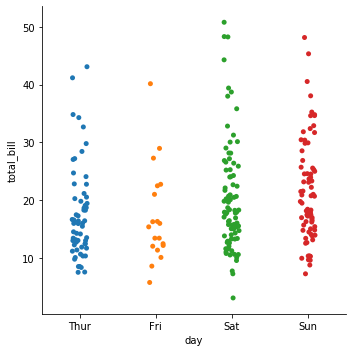

In [33]:
sns.catplot(x='day',y='total_bill',data=tips)

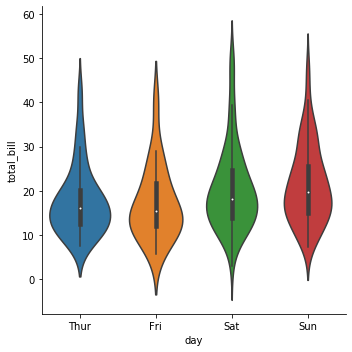

In [34]:
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

# Matrix plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

### Heatmap

Find correlation or pivot table to convert the dataset to a matrix form i.e. both rows and columns have a variable identifier

In [35]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


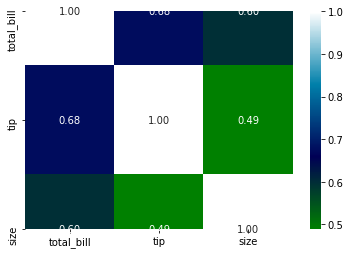

In [39]:
sns.heatmap(tips.corr(),annot=True,cmap='ocean',fmt='.2f')

Another dataset:

In [40]:
flights = sns.load_dataset('flights')

In [41]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [42]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


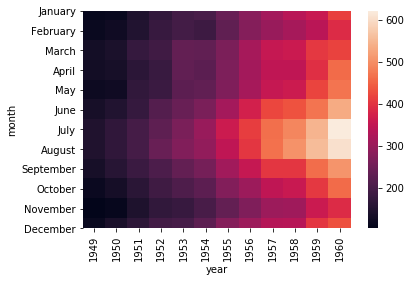

In [43]:
sns.heatmap(flights.pivot_table(index='month',columns='year',values='passengers',fill_value=0))

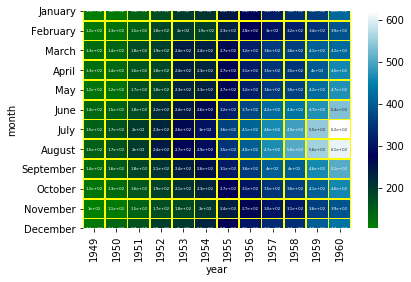

In [44]:

sns.heatmap(flights.pivot_table(index='month',columns='year',values='passengers',fill_value=0),cmap='ocean',linewidth=0.75,linecolor='yellow',annot=True,annot_kws={'size':4})

### Clustermap

Uses hierarchical clustering to produce a clustered version of the heatmap

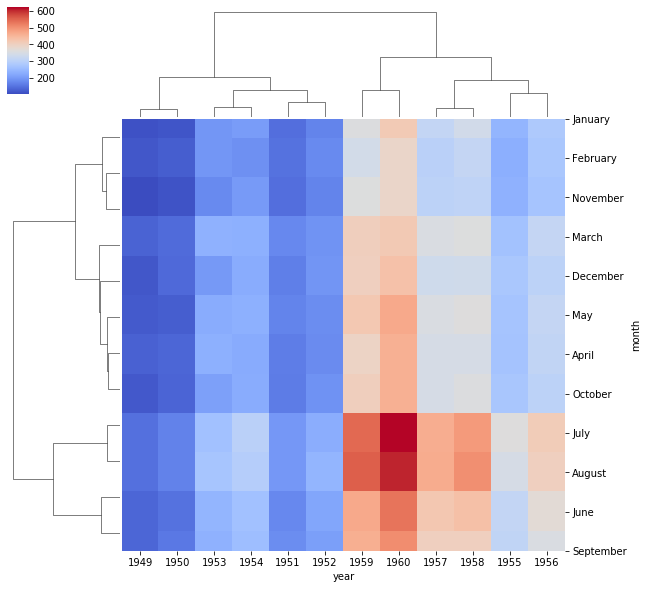

In [45]:
sns.clustermap(flights.pivot_table(index='month',columns='year',values='passengers',fill_value=0),cmap='coolwarm')

Use the argument standard scale to set the gradient scale to a normal range

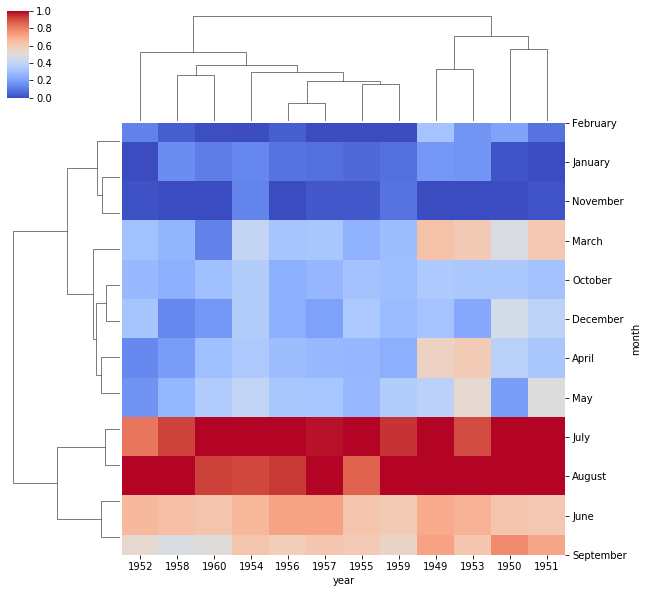

In [46]:
sns.clustermap(flights.pivot_table(index='month',columns='year',values='passengers',fill_value=0),cmap='coolwarm',standard_scale=1)

# Grid plots

Grids are general types of plots that allow to map plot types to rows and columns of a grid, this helps create similar plots separated by features.

In [47]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PairGrid

Same as pairplot in distribution plots with the difference that it gives a lot more control over the plots

a simple PairGrid call will give an empty grid result, then map to the grid

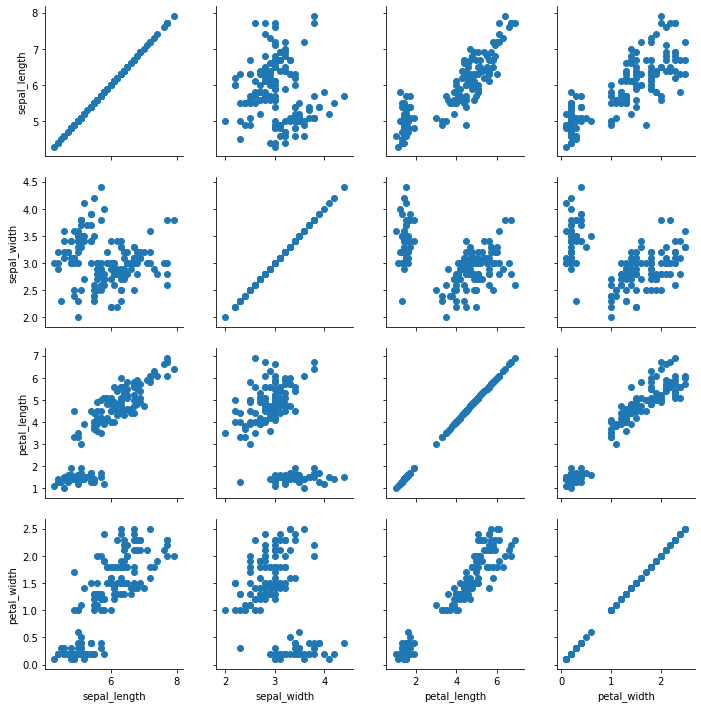

In [49]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

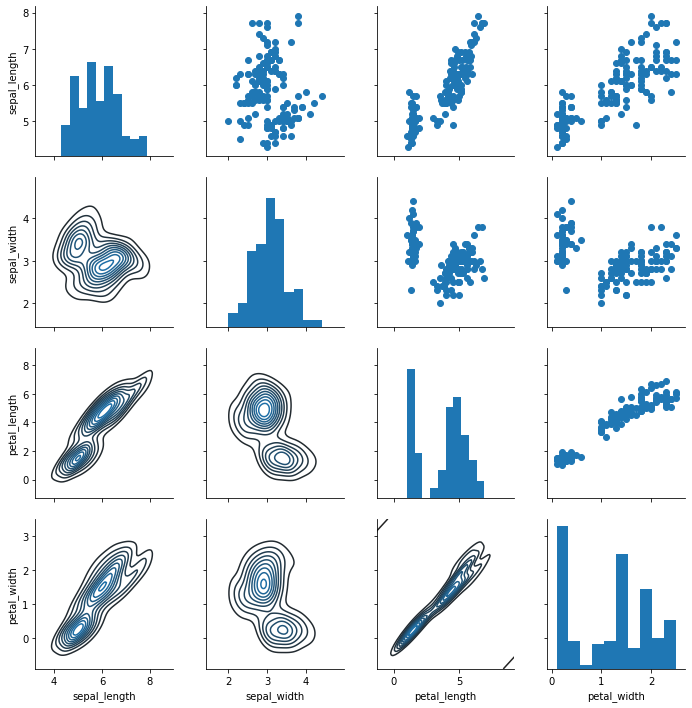

In [50]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### Pairplot
pairplot is a simpler version of PairGrid

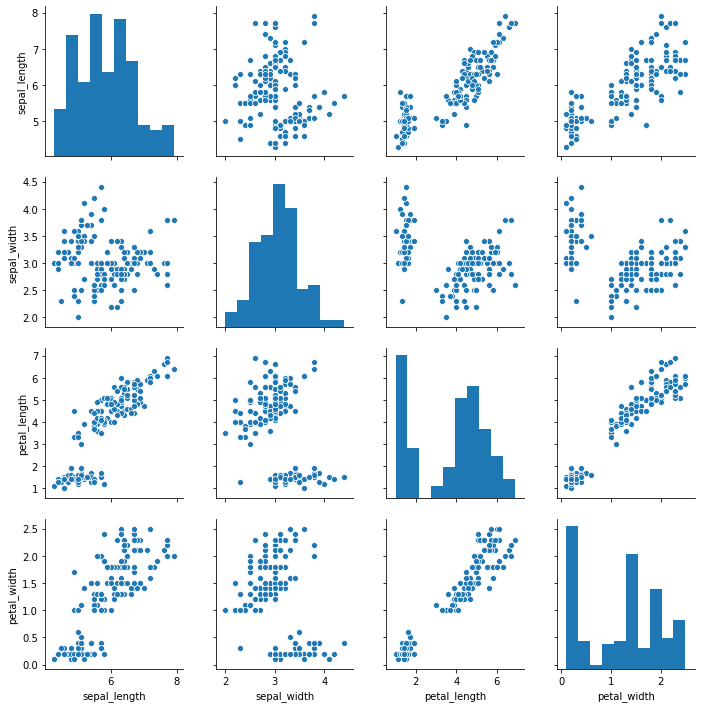

In [51]:
sns.pairplot(iris)

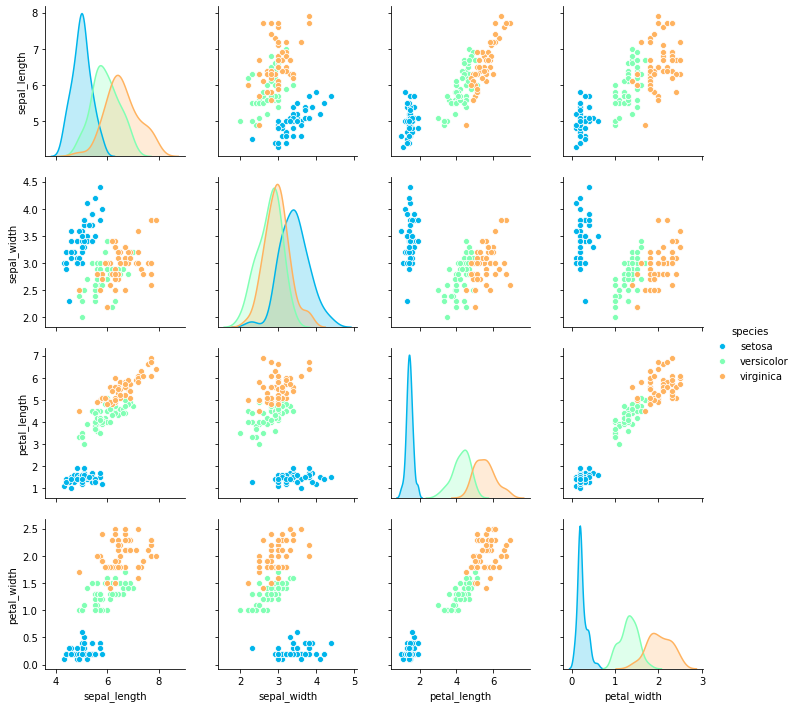

In [52]:
sns.pairplot(iris,hue='species',palette='rainbow')

### Facet Grid
It creates plots based on all the combinations of the row and columns provided & the feature names to be plotted are provided with the plot type in the map function

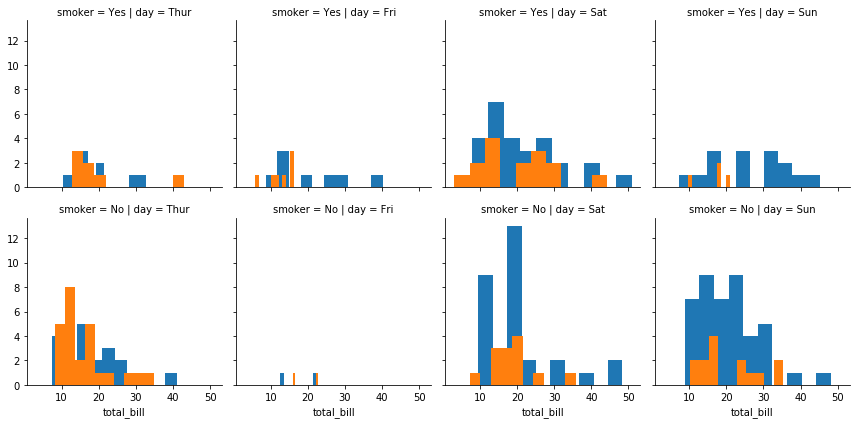

In [53]:
fg = sns.FacetGrid(tips,col='day',row='smoker',hue='sex')
fg= fg.map(plt.hist,"total_bill",bins=10)

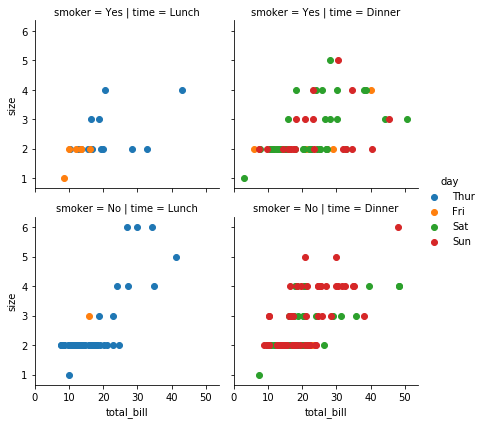

In [54]:
fg = sns.FacetGrid(tips,col='time',row='smoker',hue='day')
fg = fg.map(plt.scatter,'total_bill','size').add_legend()

### JointGrid
JointGrid is the general version for jointplot() type grids

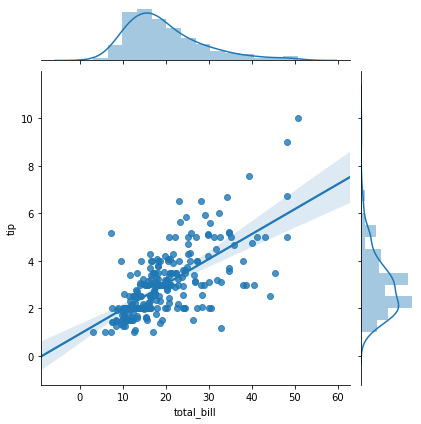

In [55]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

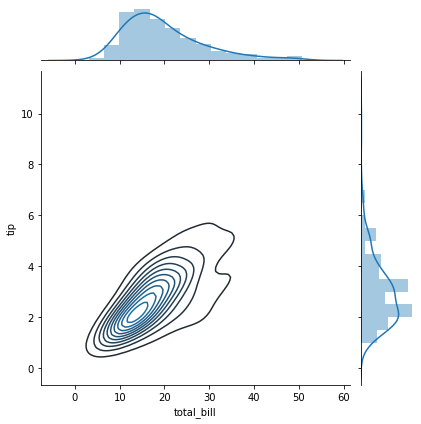

In [56]:
jg = sns.JointGrid(data=tips,x='total_bill',y='tip')
jg = jg.plot(sns.kdeplot,sns.distplot)

# Regression Plots

### lmplot

lmplot displays linear models, we can also customise marker styles and their sizes, etc

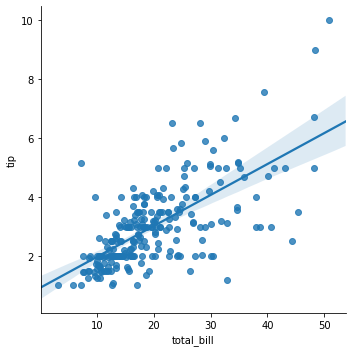

In [57]:
sns.lmplot('total_bill','tip',tips)

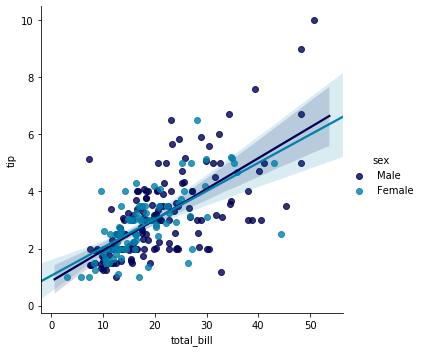

In [58]:
sns.lmplot('total_bill','tip',tips,hue='sex',palette='ocean')

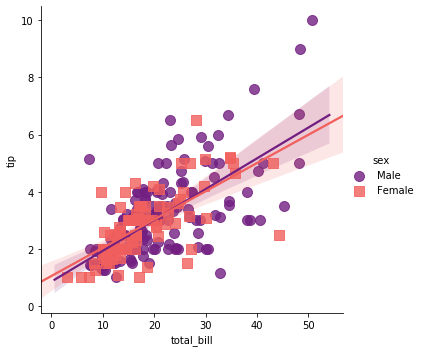

In [59]:
sns.lmplot('total_bill','tip',tips,hue='sex',palette='magma',markers=['o','s'],scatter_kws={'s':100})

Make more variable separation by using columns and rows.For example,

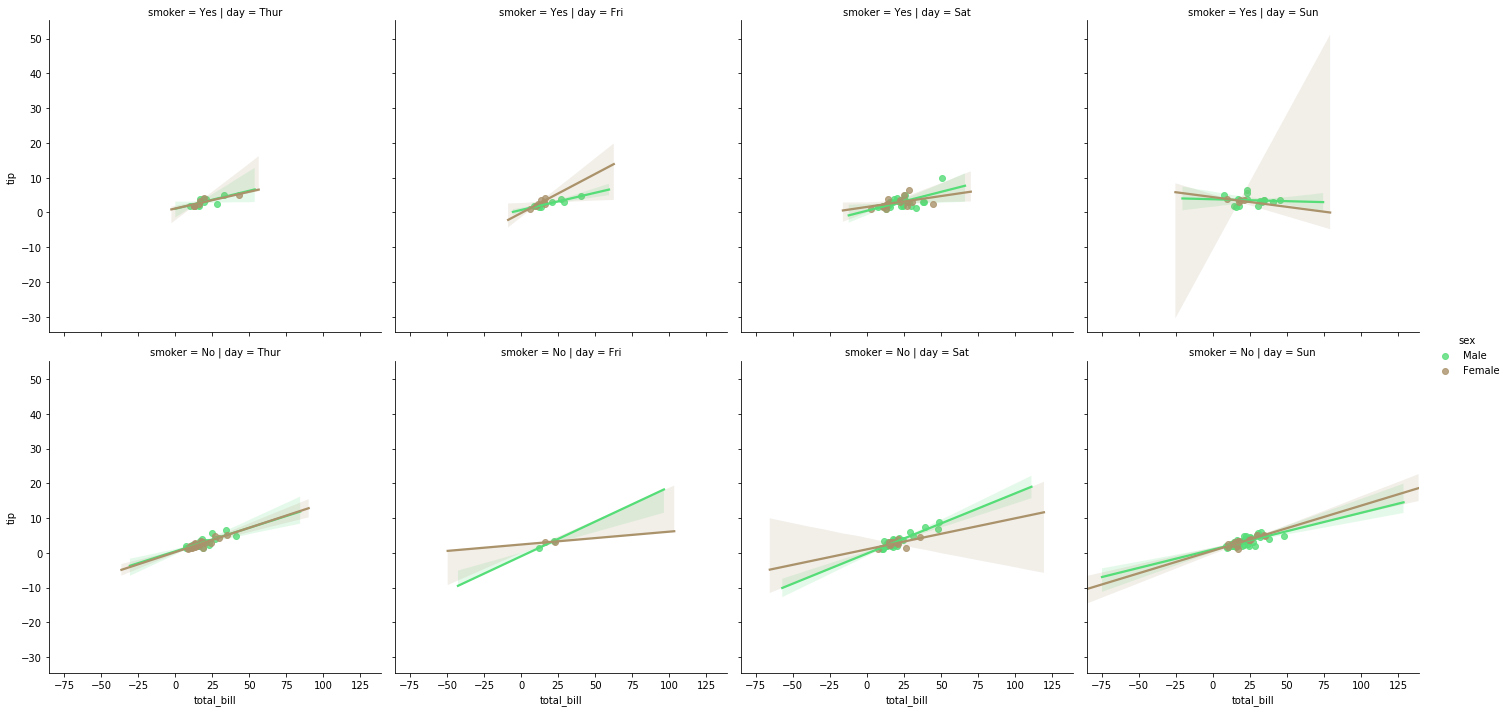

In [60]:
sns.lmplot('total_bill','tip',tips,hue='sex',palette='terrain',row='smoker',col='day')

Adjust the size(height of the facet) and aspect ratio (horizontal) using these parameters:

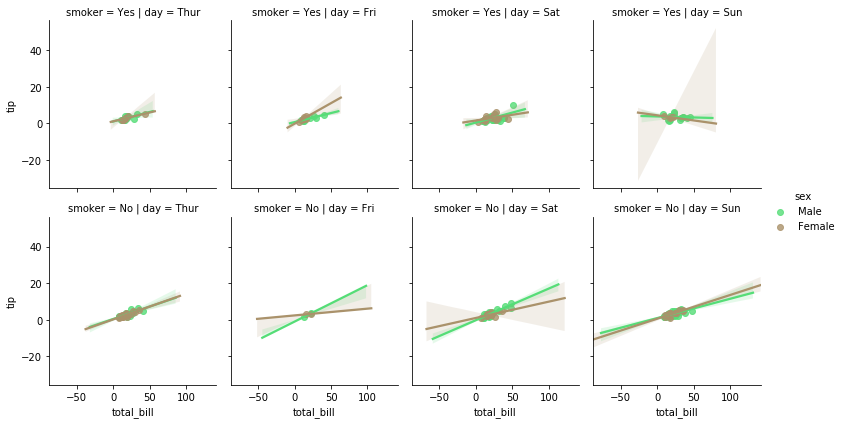

In [61]:
sns.lmplot('total_bill','tip',tips,hue='sex',palette='terrain',row='smoker',col='day',aspect=0.9,height=3)

# Styles and colors

In [62]:
sns.__version__    #to check the seaborn version

'0.9.0'

In [63]:
sns.set()           #to reset to defaults

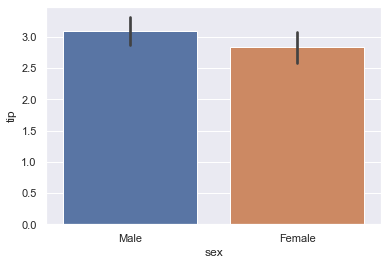

In [64]:
sns.set_style(style='darkgrid')
sns.barplot(x='sex',y='tip',data=tips)

Setting the ticks and removing them using despine()

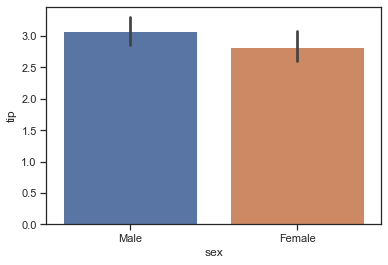

In [65]:
sns.set_style("ticks")
sns.barplot(x='sex',y='tip',data=tips)
#sns.despine()
#sns.despine(left=False,bottom=False,top=True,right=True)

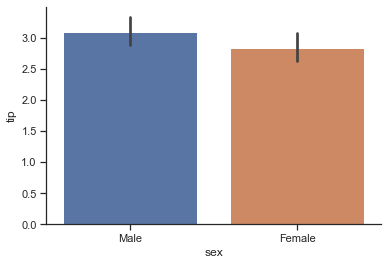

In [66]:
sns.set_style("ticks")
sns.barplot(x='sex',y='tip',data=tips)
sns.despine(left=False,bottom=False,top=True,right=True)

Offset is the distance of the plot from the axes and trim=True bends the axis to the label starting point ( see x axis)

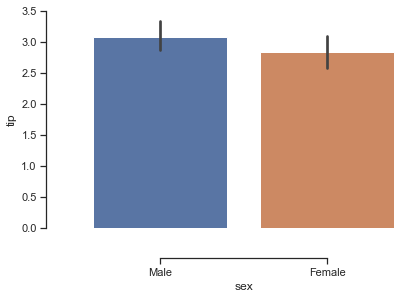

In [67]:
sns.set_style("ticks")
sns.barplot(x='sex',y='tip',data=tips)
sns.despine(offset=30,trim=True)

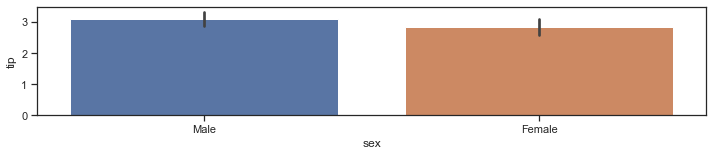

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,2))
sns.barplot(x='sex',y='tip',data=tips)

Set scale and context:

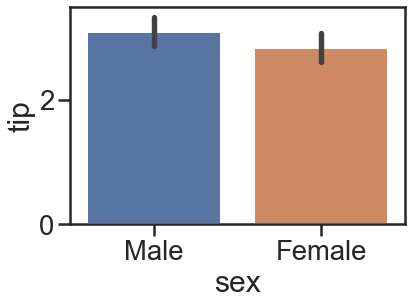

In [69]:
sns.set_context("poster",font_scale=1.25)  #Can take values paper, notebook, talk
sns.barplot(x='sex',y='tip',data=tips)

Set palette:

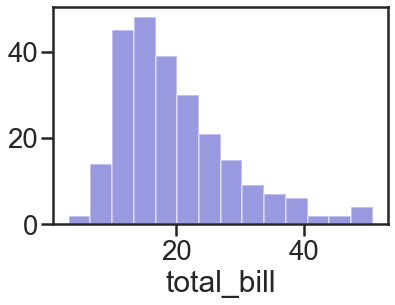

In [70]:
sns.set_palette('seismic')
sns.distplot(tips['total_bill'],kde=False)

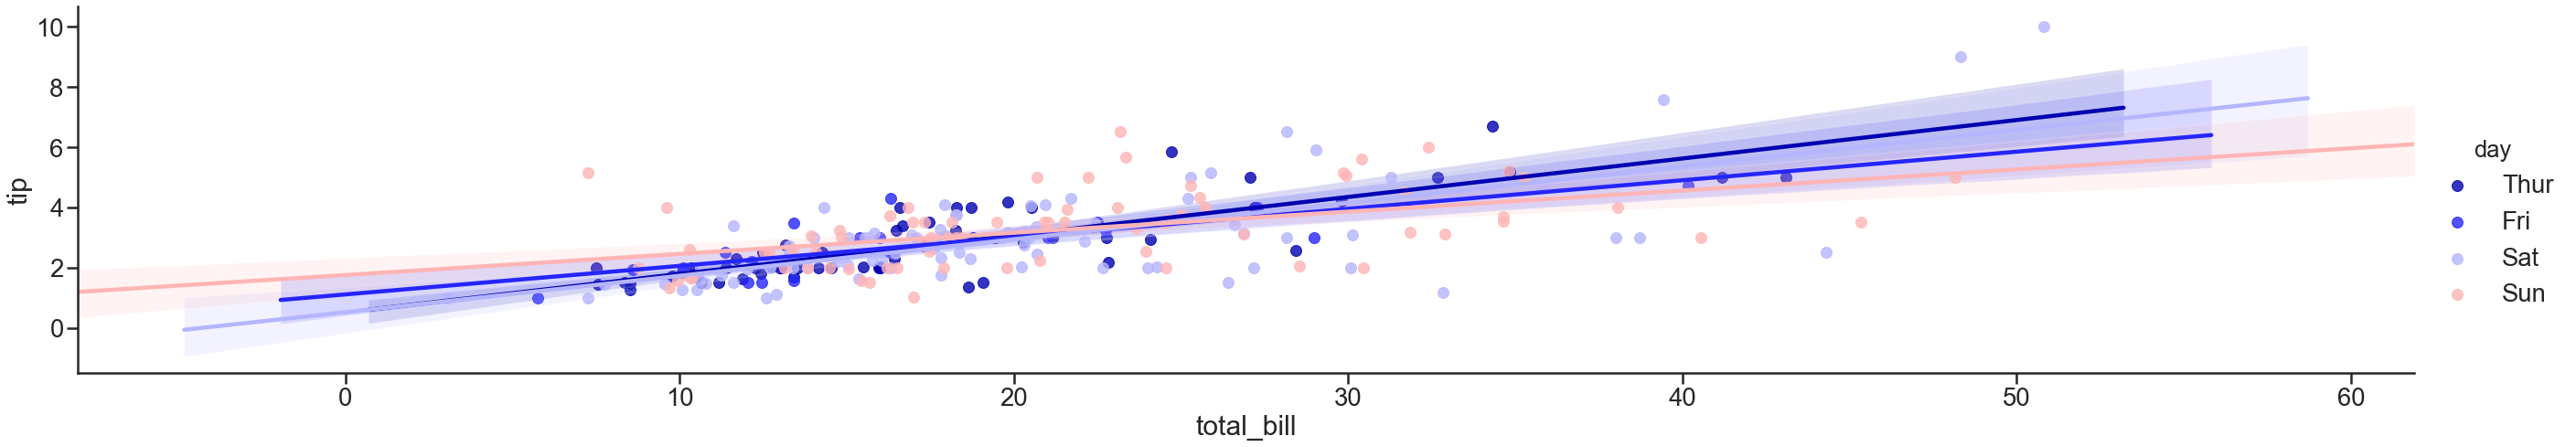

In [71]:
sns.lmplot('total_bill','tip',tips,hue='day',aspect=5,height=7.5).savefig('colorpaletteexample.png')

# Analysing the Titanic dataset with Seaborn

In [73]:
sns.set_style('whitegrid')

In [74]:
titanic = sns.load_dataset('titanic')

In [75]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The distribution variation of passengers' age with respect to fare :

In [76]:
from scipy.stats import stats

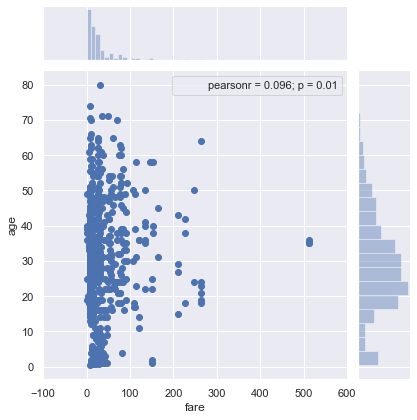

In [80]:
j = sns.jointplot(x='fare',y='age',data=titanic,xlim=(-100,600))
j = j.annotate(stats.pearsonr)

Finding out the number of passengers in different fare slabs:

(0, 500)

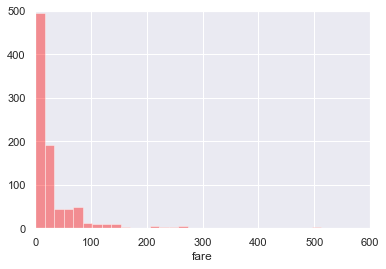

In [81]:
sns.distplot(titanic['fare'],bins=30,color='red',kde=False)
plt.xlim(0,600)
plt.ylim(0,500)

The boxplot for passenger's ticket class versus his/her age :

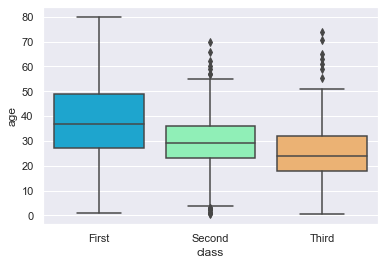

In [82]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')


Distribution of passenger's ticket class values with respect to age:

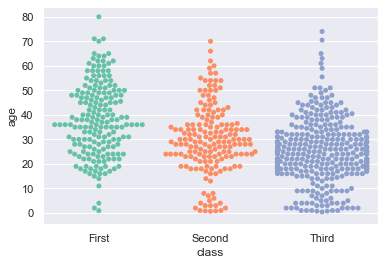

In [83]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

Number of male and female passengers:

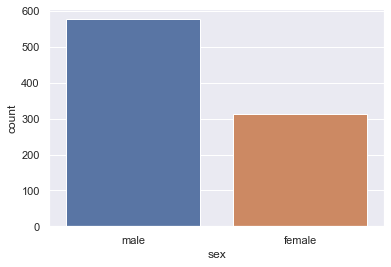

In [84]:
sns.countplot(titanic['sex'])

Finding correlation between all variables with each other:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

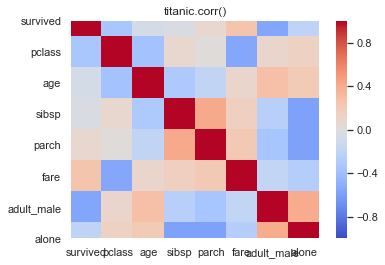

In [85]:
sns.heatmap(titanic.corr(),cmap='coolwarm',square=True,vmin=-1,vmax=1)
plt.title('titanic.corr()')
plt.xticks(rotation=0)

Finding the distribution of age in male and female passengers:

In [86]:
plt.rcParams['patch.force_edgecolor'] = True

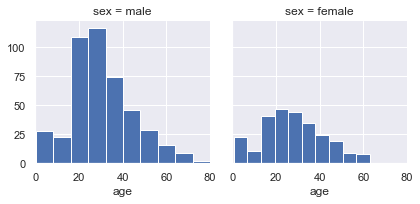

In [87]:
f= sns.FacetGrid(titanic,col='sex',xlim=(0,80))
f = f.map(plt.hist,'age')